In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import scipy
import glob
# import pingouin as pg
# import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 
import matplotlib.animation as animation
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# Set the default Pandas float precision to 3 decimals
pd.set_option("display.precision", 3)

None
filename:  2021_7_5_15_43_4_Ch1_61_2N.envisible
CH1:  7.0829957883
CH2:  0.0
CH3:  0.0
CH4:  0.0
filename:  2021_7_5_15_46_13_Ch1_40_6N.envisible
CH1:  6.63668722881188
CH2:  0.0
CH3:  0.0
CH4:  0.0
filename:  2021_7_5_15_46_56_Ch1_32N.envisible
CH1:  6.5019841919
CH2:  0.0
CH3:  0.0
CH4:  0.0
filename:  2021_7_5_15_47_26_Ch1_20_8N.envisible
CH1:  6.314220152178219
CH2:  0.0
CH3:  0.0
CH4:  0.0
filename:  2021_7_5_15_48_36_Ch1_0N.envisible
CH1:  6.115056985841584
CH2:  0.0
CH3:  0.0
CH4:  0.0
filename:  2021_7_5_15_48_8_Ch1_12_2N.envisible
CH1:  6.178455133465346
CH2:  0.0
CH3:  0.0
CH4:  0.0
[7.09102661, 6.64380249, 6.50775879, 6.32100586, 6.12040283, 6.1840686]


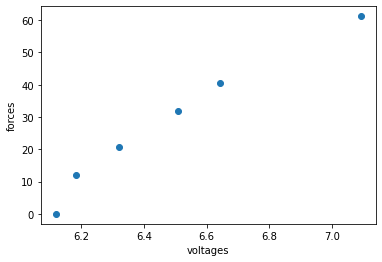

In [9]:
values=[]
unsortedData=glob.glob('2021*Ch1*.envisible')
sortedData=unsortedData.sort()
print(sortedData)
i=0
for f in sorted(glob.glob('2021*Ch1*.envisible')):
    i=i+1
    if i>=7:
        data = pd.read_csv(f,sep='\t',skiprows=15)
        data = data.iloc[1:]
        data["CH0"]=data.CH0.astype(float)
        data["CH1"]=data.CH1.astype(float)
        data["CH2"]=data.CH2.astype(float)
        data["CH3"]=data.CH3.astype(float)
        values.append(data.CH0.max())
    
        temp=f.index('en')
        force=f[temp-5:temp-1]
        force=force.replace('_',".")
        print('filename: ',f)
        print('CH1: ',data.CH0.mean())
        print('CH2: ',data.CH1.mean())
        print('CH3: ',data.CH2.mean())
        print('CH4: ',data.CH3.mean())

print(values)
y_values=[61.2,40.6,32,20.8,0,12.2]# for ch1
#y_values=[99,74.8,50.2,25.6]

    
plt.scatter(values,y_values)
plt.xlabel("voltages")
plt.ylabel("forces")
plt.show()




In [10]:
z = np.polyfit(values,y_values , 2) #ax2+bx+c
print(z)

[  -29.57888014   450.21134974 -1644.23706469]


In [67]:
data.shape

(12617, 18)

In [44]:
data = data.iloc[1:]
data.head()


,CH0,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CHDIV1,CHDIV2,a_X,a_Y,a_Z,OMEGA_X,OMEGA_Y,OMEGA_Z,labelID,ElapsedTime
2,1.51870789,1.56623383,1.45169128,1.41265411,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10.00000000
3,1.51842865,1.56573120,1.45213806,1.41114624,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,20.00000000
4,1.51854034,1.56589874,1.45208221,1.41181641,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,30.00000000
5,1.51881958,1.56539612,1.45141205,1.41209564,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,40.00000000
6,1.51898712,1.56539612,1.45180298,1.41181641,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,50.00000000


In [45]:
data.describe() 


,CH0,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CHDIV1,CHDIV2,a_X,a_Y,a_Z,OMEGA_X,OMEGA_Y,OMEGA_Z,labelID,ElapsedTime
count,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616
unique,77,81,90,80,1,1,1,1,1,1,1,1,1,1,1,1,1,12616
top,1.51842865,1.56573120,1.45180298,1.41170471,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,116500.00000000
freq,563,493,544,589,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,12616,1


In [49]:
data["CH0"]=data.CH0.astype(float)
data["CH1"]=data.CH1.astype(float)
data["CH2"]=data.CH2.astype(float)
data["CH3"]=data.CH3.astype(float)

In [50]:
data.describe() 

,CH0,CH1,CH2,CH3
count,1.262e+04,1.262e+04,1.262e+04,1.262e+04
mean,1.518e+00,1.566e+00,1.452e+00,1.412e+00
std,5.950e-04,6.208e-04,6.062e-04,5.716e-04
min,1.516e+00,1.563e+00,1.450e+00,1.409e+00
25%,1.518e+00,1.565e+00,1.452e+00,1.411e+00
50%,1.518e+00,1.566e+00,1.452e+00,1.412e+00
75%,1.519e+00,1.566e+00,1.452e+00,1.412e+00
max,1.521e+00,1.569e+00,1.460e+00,1.417e+00


Live Graph

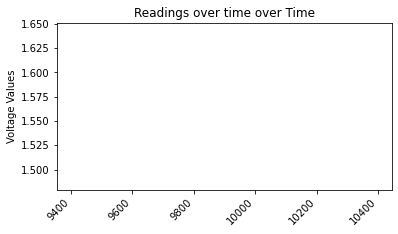

In [118]:


# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []

# Initialize communication with TMP102
data = pd.read_csv("2021_7_5_10_49_46_left_Ch1_1.envisible",sep='\t',skiprows=15)
data = data.iloc[1:]
data["CH0"]=data.CH0.astype(float)
data["CH1"]=data.CH1.astype(float)
data["CH2"]=data.CH2.astype(float)
data["CH3"]=data.CH3.astype(float)

# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    # Read temperature (Celsius) from TMP102
#     temp_c = round(tmp102.read_temp(), 2)
    
    data = pd.read_csv("2021_7_5_10_49_46_left_Ch1_1.envisible",sep='\t',skiprows=15)
    data = data.iloc[1:]
    data["CH0"]=data.CH0.astype(float)
    data["CH1"]=data.CH1.astype(float)
    data["CH2"]=data.CH2.astype(float)
    data["CH3"]=data.CH3.astype(float)
    data["ElapsedTime"]=data.ElapsedTime.astype(float)
    
    # Add x and y to lists
    xs.append(data["ElapsedTime"].tail(1))
    ys.append(data["CH0"].tail(1))

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('Readings over time over Time')
    plt.ylabel('Voltage Values')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=1000)
plt.show()
